# Assignment 01: Multi-class Classification 
In this Assignment, you will train a deep model on the CIFAR10 from the scratch using PyTorch.

### Basic Imports

In [29]:
import os
import time
import os.path as osp

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms
import torchvision

import matplotlib.pyplot as plt
from PIL import Image

### Hyperparameters

In [30]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
# LEARNING_RATE = 1e-2
# LEARNING_RATE = 1e-3
MOMENTUM = 0.9
STEP=5
GAMMA=0.5


### Device

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### Dataset


In [32]:
# cifar10 transform
transform_cifar10_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_cifar10_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_set = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform_cifar10_train)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform_cifar10_test)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Files already downloaded and verified
Files already downloaded and verified


### Model

In [33]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 3)  
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 8 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [34]:
model = ConvNet()
model.to(device)

ConvNet(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

### Optimizer

In [35]:
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

### Task 1: per batch training/testing
---

Please denfine two function named ``train_batch`` and ``test_batch``. These functions are essential for training and evaluating machine learning models using batched data from dataloaders.

**To do**: 
1. Define the loss function i.e [nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
2. Take the image as the input and generate the output using the pre-defined SimpleNet.
3. Calculate the loss between the output and the corresponding label using the loss function.

In [36]:
##################### Write your answer here ##################
# Define the loss function
# criterion = nn.L1Loss()
criterion = nn.CrossEntropyLoss()

# class FocalLoss(nn.Module):
#     def __init__(self, gamma=2):
#         super(FocalLoss, self).__init__()
#         self.gamma = gamma

#     def forward(self, inputs, targets):
#         ce_loss = F.cross_entropy(inputs, targets, reduction='none')
#         p_t = torch.exp(-ce_loss)
#         focal_weight = (1 - p_t) ** self.gamma
#         focal_loss = focal_weight * ce_loss
#         return focal_loss.mean()
# criterion = FocalLoss(gamma=0.5)
# criterion = FocalLoss(gamma=2)

###############################################################

In [37]:
def train_batch(model, image, target):
    """
    Perform one training batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to train.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated by the defined loss function loss_fn().
    """
    
    ##################### Write your answer here ##################
#     target = target.view(-1, 1)
    output = model(image)
    loss = criterion(output, target)
    ###############################################################

    return output, loss

In [38]:

def test_batch(model, image, target):
    """
    Perform one testing batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to evaluate.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated for the batch.
    """

    ##################### Write your answer here ##################
#     target = target.view(-1, 1)
    output =  model(image)
    loss = criterion(output, target)
    ##############################################################

    return output, loss

### Model Training

In [39]:
# training_loss = []
# training_acc = []
# testing_loss = []
# testing_acc = []

# model = ConvNet()
# model.to(device)

# for epoch in range(NUM_EPOCHS):
#     model.train()
#     torch.cuda.empty_cache()

#     ##########################
#     ### Training
#     ##########################

#     running_cls_loss = 0.0
#     running_cls_corrects = 0

#     for batch_idx, (image, target) in enumerate(train_dataloader):

#         image = image.to(device)
#         target = target.to(device)

#         # train model
#         outputs, loss = train_batch(model, image, target)
#         _, preds = torch.max(outputs, 1)

        
#         loss_data = loss.data.item()
#         if np.isnan(loss_data):
#             raise ValueError('loss is nan while training')
#         running_cls_loss += loss.item()
#         running_cls_corrects += torch.sum(preds == target.data)

#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#     epoch_loss = running_cls_loss / len(train_set)
#     epoch_acc = running_cls_corrects.double() / len(train_set)

#     print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

#     training_loss.append(epoch_loss)
#     training_acc.append(epoch_acc.cpu().detach().numpy())

#     # change learning rate
#     scheduler.step()

#     model = ConvNet()
#     model.to(device)

#     ##########################
#     ### Testing
#     ##########################
#     # # eval model during training or in the last epoch
#     if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
#         print('Begin test......')
#         model.eval()
    
#         val_loss = 0.0
#         val_corrects = 0

#         for batch_idx, (image, target) in enumerate(test_dataloader):

#             image = image.to(device)
#             target = target.to(device)

#             # test model
#             outputs, loss = test_batch(model, image, target)
#             _, preds = torch.max(outputs, 1)
            
#             val_loss += loss.item()
#             val_corrects += torch.sum(preds == target.data)

#         val_loss = val_loss / len(test_set)
#         val_acc = val_corrects.double() / len(test_set)
#         print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
#         testing_loss.append(val_loss)
#         testing_acc.append(val_acc.cpu().detach().numpy())

#         # save the model in last epoch
#         if (epoch +1) == NUM_EPOCHS:
            
#             state = {
#             'state_dict': model.state_dict(),
#             'acc': epoch_acc,
#             'epoch': (epoch+1),
#             }

#             # check the dir
#             if not os.path.exists(SAVE_DIR):
#                 os.makedirs(SAVE_DIR)

#             # save the state
#             torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))

training_loss = []
training_acc = []
testing_loss = []
testing_acc = []

for epoch in range(NUM_EPOCHS):
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    training_loss.append(epoch_loss)
    training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        testing_loss.append(val_loss)
        testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))


Epoch: 1/30 Train Loss: 0.0149 Acc: 0.2878
Begin test......
Test Loss: 0.0130 Acc: 0.3993
Epoch: 2/30 Train Loss: 0.0137 Acc: 0.3552
Begin test......
Test Loss: 0.0129 Acc: 0.3934
Epoch: 3/30 Train Loss: 0.0135 Acc: 0.3647
Begin test......
Test Loss: 0.0132 Acc: 0.3809
Epoch: 4/30 Train Loss: 0.0134 Acc: 0.3749
Begin test......
Test Loss: 0.0136 Acc: 0.3706
Epoch: 5/30 Train Loss: 0.0134 Acc: 0.3783
Begin test......
Test Loss: 0.0128 Acc: 0.4188
Epoch: 6/30 Train Loss: 0.0123 Acc: 0.4229
Begin test......
Test Loss: 0.0115 Acc: 0.4713
Epoch: 7/30 Train Loss: 0.0121 Acc: 0.4394
Begin test......
Test Loss: 0.0113 Acc: 0.4816
Epoch: 8/30 Train Loss: 0.0119 Acc: 0.4454
Begin test......
Test Loss: 0.0114 Acc: 0.4771
Epoch: 9/30 Train Loss: 0.0118 Acc: 0.4541
Begin test......
Test Loss: 0.0113 Acc: 0.4858
Epoch: 10/30 Train Loss: 0.0118 Acc: 0.4578
Begin test......
Test Loss: 0.0113 Acc: 0.4793
Epoch: 11/30 Train Loss: 0.0112 Acc: 0.4866
Begin test......
Test Loss: 0.0104 Acc: 0.5262
Epoch: 1

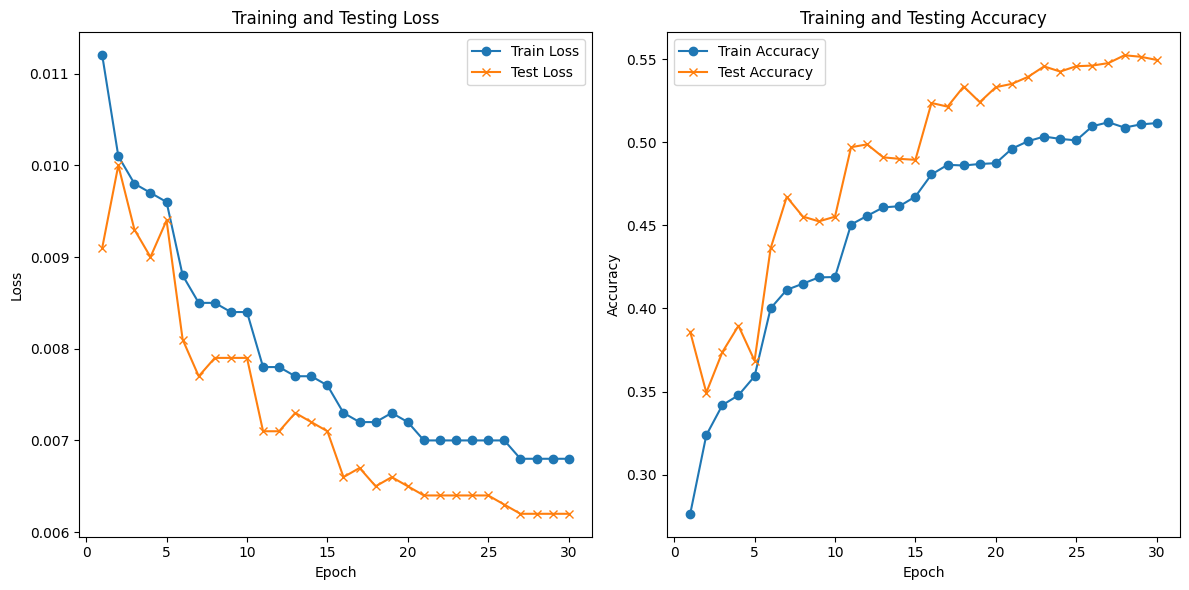

In [41]:
import matplotlib.pyplot as plt

# 模拟数据
epochs = range(1, 31)  # 1到30个epoch

# # l1Loss
# train_loss = [
#     0.0206, 0.0192, 0.0187, 0.0185, 0.0182,
#     0.0177, 0.0176, 0.0176, 0.0174, 0.0173,
#     0.0170, 0.0168, 0.0166, 0.0164, 0.0162,
#     0.0158, 0.0157, 0.0156, 0.0156, 0.0154,
#     0.0152, 0.0153, 0.0152, 0.0152, 0.0151,
#     0.0151, 0.0150, 0.0150, 0.0150, 0.0149
# ]

# train_acc = [
#     0.1176, 0.1272, 0.1032, 0.0967, 0.1021,
#     0.0949, 0.1011, 0.0966, 0.1042, 0.0992,
#     0.0987, 0.0976, 0.0948, 0.1072, 0.0966,
#     0.1020, 0.0949, 0.1064, 0.1036, 0.0974,
#     0.0952, 0.0950, 0.0956, 0.0995, 0.0973,
#     0.0903, 0.1003, 0.0890, 0.0922, 0.0906
# ]

# test_loss = [
#     0.0195, 0.0189, 0.0185, 0.0183, 0.0178,
#     0.0173, 0.0173, 0.0171, 0.0177, 0.0172,
#     0.0167, 0.0165, 0.0163, 0.0155, 0.0157,
#     0.0153, 0.0151, 0.0152, 0.0150, 0.0155,
#     0.0149, 0.0148, 0.0150, 0.0147, 0.0147,
#     0.0146, 0.0145, 0.0145, 0.0146, 0.0145
# ]

# test_acc = [
#     0.1028, 0.1019, 0.1173, 0.1233, 0.0815,
#     0.0787, 0.0947, 0.1001, 0.0510, 0.0727,
#     0.1040, 0.1006, 0.0903, 0.0951, 0.0677,
#     0.0918, 0.1360, 0.0655, 0.1234, 0.0694,
#     0.1049, 0.1280, 0.0873, 0.0627, 0.0858,
#     0.1001, 0.1285, 0.0513, 0.1024, 0.0819
# ]


# 交叉熵损失函数
# train_loss = [
#     0.0149, 0.0137, 0.0135, 0.0134, 0.0134,
#     0.0123, 0.0121, 0.0119, 0.0118, 0.0118,
#     0.0112, 0.0111, 0.0110, 0.0110, 0.0109,
#     0.0106, 0.0105, 0.0105, 0.0104, 0.0105,
#     0.0102, 0.0101, 0.0102, 0.0101, 0.0101,
#     0.0100, 0.0100, 0.0100, 0.0100, 0.0100
# ]

# train_acc = [
#     0.2878, 0.3552, 0.3647, 0.3749, 0.3783,
#     0.4229, 0.4394, 0.4454, 0.4541, 0.4578,
#     0.4866, 0.4895, 0.4886, 0.4917, 0.4950,
#     0.5102, 0.5112, 0.5161, 0.5178, 0.5190,
#     0.5297, 0.5340, 0.5338, 0.5326, 0.5356,
#     0.5407, 0.5403, 0.5397, 0.5411, 0.5428
# ]

# test_loss = [
#     0.0130, 0.0129, 0.0132, 0.0136, 0.0128,
#     0.0115, 0.0113, 0.0114, 0.0113, 0.0113,
#     0.0104, 0.0102, 0.0103, 0.0105, 0.0103,
#     0.0099, 0.0099, 0.0098, 0.0097, 0.0098,
#     0.0097, 0.0095, 0.0096, 0.0095, 0.0095,
#     0.0093, 0.0093, 0.0093, 0.0093, 0.0093
# ]

# test_acc = [
#     0.3993, 0.3934, 0.3809, 0.3706, 0.4188,
#     0.4713, 0.4816, 0.4771, 0.4858, 0.4793,
#     0.5262, 0.5403, 0.5335, 0.5297, 0.5362,
#     0.5534, 0.5456, 0.5609, 0.5653, 0.5596,
#     0.5604, 0.5687, 0.5662, 0.5742, 0.5791,
#     0.5832, 0.5795, 0.5828, 0.5846, 0.5850
# ]


# FocalLoss(gamma=0.5)
# train_loss = [
#     0.0139, 0.0127, 0.0125, 0.0123, 0.0121,
#     0.0113, 0.0111, 0.0110, 0.0109, 0.0108,
#     0.0103, 0.0101, 0.0100, 0.0100, 0.0100,
#     0.0097, 0.0096, 0.0095, 0.0095, 0.0095,
#     0.0093, 0.0092, 0.0092, 0.0092, 0.0092,
#     0.0090, 0.0091, 0.0090, 0.0090, 0.0090
# ]

# train_acc = [
#     0.2784, 0.3400, 0.3546, 0.3624, 0.3764,
#     0.4171, 0.4258, 0.4330, 0.4402, 0.4441,
#     0.4653, 0.4724, 0.4776, 0.4822, 0.4816,
#     0.4957, 0.5005, 0.5037, 0.5046, 0.5049,
#     0.5168, 0.5205, 0.5201, 0.5228, 0.5241,
#     0.5252, 0.5288, 0.5287, 0.5309, 0.5315
# ]

# test_loss = [
#     0.0125, 0.0124, 0.0120, 0.0115, 0.0118,
#     0.0105, 0.0110, 0.0104, 0.0102, 0.0101,
#     0.0096, 0.0094, 0.0093, 0.0092, 0.0093,
#     0.0090, 0.0090, 0.0088, 0.0088, 0.0086,
#     0.0087, 0.0085, 0.0085, 0.0086, 0.0084,
#     0.0084, 0.0083, 0.0083, 0.0084, 0.0083
# ]

# test_acc = [
#     0.3639, 0.3742, 0.3692, 0.4181, 0.4074,
#     0.4547, 0.4540, 0.4683, 0.4762, 0.4747,
#     0.5039, 0.5167, 0.5190, 0.5217, 0.5196,
#     0.5423, 0.5320, 0.5469, 0.5370, 0.5539,
#     0.5525, 0.5622, 0.5656, 0.5612, 0.5675,
#     0.5630, 0.5722, 0.5704, 0.5716, 0.5750
# ]

# FocalLoss(gamma=2)
# train_loss = [
#     0.0112, 0.0101, 0.0098, 0.0097, 0.0096,
#     0.0088, 0.0085, 0.0085, 0.0084, 0.0084,
#     0.0078, 0.0078, 0.0077, 0.0077, 0.0076,
#     0.0073, 0.0072, 0.0072, 0.0073, 0.0072,
#     0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
#     0.0070, 0.0068, 0.0068, 0.0068, 0.0068
# ]

# train_acc = [
#     0.2765, 0.3238, 0.3419, 0.3478, 0.3592,
#     0.4001, 0.4112, 0.4149, 0.4187, 0.4189,
#     0.4505, 0.4557, 0.4608, 0.4615, 0.4673,
#     0.4806, 0.4864, 0.4860, 0.4869, 0.4874,
#     0.4961, 0.5006, 0.5034, 0.5020, 0.5011,
#     0.5096, 0.5120, 0.5088, 0.5107, 0.5115
# ]

# test_loss = [
#     0.0091, 0.0100, 0.0093, 0.0090, 0.0094,
#     0.0081, 0.0077, 0.0079, 0.0079, 0.0079,
#     0.0071, 0.0071, 0.0073, 0.0072, 0.0071,
#     0.0066, 0.0067, 0.0065, 0.0066, 0.0065,
#     0.0064, 0.0064, 0.0064, 0.0064, 0.0064,
#     0.0063, 0.0062, 0.0062, 0.0062, 0.0062
# ]

# test_acc = [
#     0.3859, 0.3494, 0.3738, 0.3896, 0.3686,
#     0.4362, 0.4671, 0.4553, 0.4524, 0.4552,
#     0.4970, 0.4987, 0.4909, 0.4900, 0.4894,
#     0.5236, 0.5214, 0.5335, 0.5241, 0.5331,
#     0.5351, 0.5393, 0.5456, 0.5425, 0.5457,
#     0.5461, 0.5476, 0.5523, 0.5514, 0.5495
# ]


# 绘制Loss折线图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, test_loss, label='Test Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

# 绘制Accuracy折线图
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, test_acc, label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


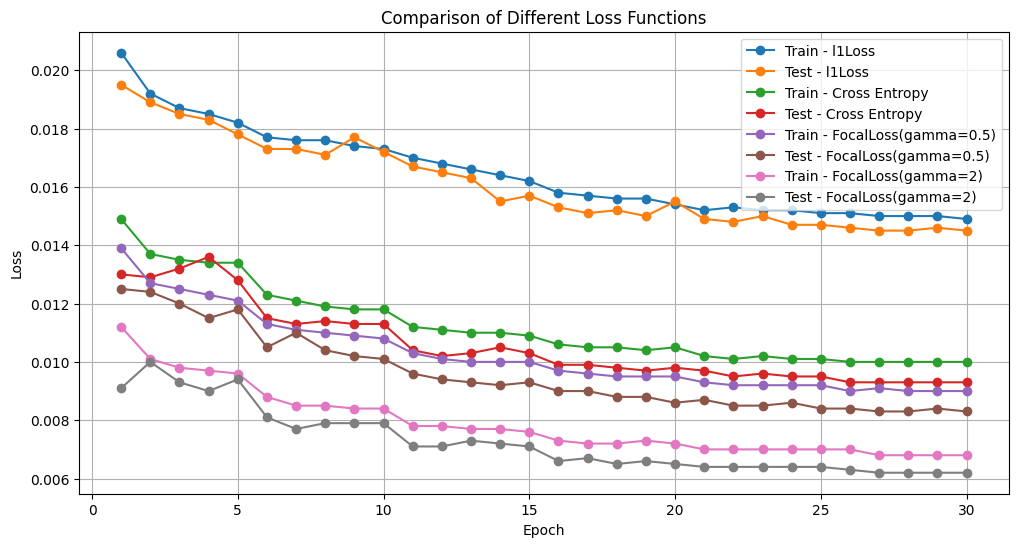

In [44]:
import matplotlib.pyplot as plt

# 数据
epochs = list(range(1, 31))  # 30个epochs

# 损失数据
train_loss_l1 = [
    0.0206, 0.0192, 0.0187, 0.0185, 0.0182,
    0.0177, 0.0176, 0.0176, 0.0174, 0.0173,
    0.0170, 0.0168, 0.0166, 0.0164, 0.0162,
    0.0158, 0.0157, 0.0156, 0.0156, 0.0154,
    0.0152, 0.0153, 0.0152, 0.0152, 0.0151,
    0.0151, 0.0150, 0.0150, 0.0150, 0.0149
]

test_loss_l1 = [
    0.0195, 0.0189, 0.0185, 0.0183, 0.0178,
    0.0173, 0.0173, 0.0171, 0.0177, 0.0172,
    0.0167, 0.0165, 0.0163, 0.0155, 0.0157,
    0.0153, 0.0151, 0.0152, 0.0150, 0.0155,
    0.0149, 0.0148, 0.0150, 0.0147, 0.0147,
    0.0146, 0.0145, 0.0145, 0.0146, 0.0145
]

train_loss_ce = [
    0.0149, 0.0137, 0.0135, 0.0134, 0.0134,
    0.0123, 0.0121, 0.0119, 0.0118, 0.0118,
    0.0112, 0.0111, 0.0110, 0.0110, 0.0109,
    0.0106, 0.0105, 0.0105, 0.0104, 0.0105,
    0.0102, 0.0101, 0.0102, 0.0101, 0.0101,
    0.0100, 0.0100, 0.0100, 0.0100, 0.0100
]

test_loss_ce = [
    0.0130, 0.0129, 0.0132, 0.0136, 0.0128,
    0.0115, 0.0113, 0.0114, 0.0113, 0.0113,
    0.0104, 0.0102, 0.0103, 0.0105, 0.0103,
    0.0099, 0.0099, 0.0098, 0.0097, 0.0098,
    0.0097, 0.0095, 0.0096, 0.0095, 0.0095,
    0.0093, 0.0093, 0.0093, 0.0093, 0.0093
]

train_loss_focal05 = [
    0.0139, 0.0127, 0.0125, 0.0123, 0.0121,
    0.0113, 0.0111, 0.0110, 0.0109, 0.0108,
    0.0103, 0.0101, 0.0100, 0.0100, 0.0100,
    0.0097, 0.0096, 0.0095, 0.0095, 0.0095,
    0.0093, 0.0092, 0.0092, 0.0092, 0.0092,
    0.0090, 0.0091, 0.0090, 0.0090, 0.0090
]

test_loss_focal05 = [
    0.0125, 0.0124, 0.0120, 0.0115, 0.0118,
    0.0105, 0.0110, 0.0104, 0.0102, 0.0101,
    0.0096, 0.0094, 0.0093, 0.0092, 0.0093,
    0.0090, 0.0090, 0.0088, 0.0088, 0.0086,
    0.0087, 0.0085, 0.0085, 0.0086, 0.0084,
    0.0084, 0.0083, 0.0083, 0.0084, 0.0083
]

train_loss_focal2 = [
    0.0112, 0.0101, 0.0098, 0.0097, 0.0096,
    0.0088, 0.0085, 0.0085, 0.0084, 0.0084,
    0.0078, 0.0078, 0.0077, 0.0077, 0.0076,
    0.0073, 0.0072, 0.0072, 0.0073, 0.0072,
    0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
    0.0070, 0.0068, 0.0068, 0.0068, 0.0068
]

test_loss_focal2 = [
    0.0091, 0.0100, 0.0093, 0.0090, 0.0094,
    0.0081, 0.0077, 0.0079, 0.0079, 0.0079,
    0.0071, 0.0071, 0.0073, 0.0072, 0.0071,
    0.0066, 0.0067, 0.0065, 0.0066, 0.0065,
    0.0064, 0.0064, 0.0064, 0.0064, 0.0064,
    0.0063, 0.0062, 0.0062, 0.0062, 0.0062
]

# 绘制折线图
plt.figure(figsize=(12, 6))

# l1Loss
plt.plot(x, train_loss_l1, label='Train - l1Loss', marker='o')
plt.plot(x, test_loss_l1, label='Test - l1Loss', marker='o')

# 交叉熵损失函数
plt.plot(x, train_loss_ce, label='Train - Cross Entropy', marker='o')
plt.plot(x, test_loss_ce, label='Test - Cross Entropy', marker='o')

# FocalLoss(gamma=0.5)
plt.plot(x, train_loss_focal05, label='Train - FocalLoss(gamma=0.5)', marker='o')
plt.plot(x, test_loss_focal05, label='Test - FocalLoss(gamma=0.5)', marker='o')

# FocalLoss(gamma=2)
plt.plot(x, train_loss_focal2, label='Train - FocalLoss(gamma=2)', marker='o')
plt.plot(x, test_loss_focal2, label='Test - FocalLoss(gamma=2)', marker='o')

# 设置标题和标签
plt.title('Comparison of Different Loss Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 显示图形
plt.grid(True)
plt.show()



In [46]:
import numpy as np

# l1Loss
train_loss_l1_mean = np.mean(train_loss_l1)
test_loss_l1_mean = np.mean(test_loss_l1)

# 交叉熵损失函数
train_loss_ce_mean = np.mean(train_loss_ce)
test_loss_ce_mean = np.mean(test_loss_ce)

# FocalLoss(gamma=0.5)
train_loss_focal05_mean = np.mean(train_loss_focal05)
test_loss_focal05_mean = np.mean(test_loss_focal05)

# FocalLoss(gamma=2)
train_loss_focal2_mean = np.mean(train_loss_focal2)
test_loss_focal2_mean = np.mean(test_loss_focal2)

# 打印均值
print("l1Loss - Train Mean:", train_loss_l1_mean)
print("l1Loss - Test Mean:", test_loss_l1_mean)

print("Cross Entropy - Train Mean:", train_loss_ce_mean)
print("Cross Entropy - Test Mean:", test_loss_ce_mean)

print("FocalLoss(gamma=0.5) - Train Mean:", train_loss_focal05_mean)
print("FocalLoss(gamma=0.5) - Test Mean:", test_loss_focal05_mean)

print("FocalLoss(gamma=2) - Train Mean:", train_loss_focal2_mean)
print("FocalLoss(gamma=2) - Test Mean:", test_loss_focal2_mean)


l1Loss - Train Mean: 0.01649666666666667
l1Loss - Test Mean: 0.01610666666666667
Cross Entropy - Train Mean: 0.011240000000000002
Cross Entropy - Test Mean: 0.010579999999999996
FocalLoss(gamma=0.5) - Train Mean: 0.010266666666666667
FocalLoss(gamma=0.5) - Test Mean: 0.009593333333333332
FocalLoss(gamma=2) - Train Mean: 0.007899999999999999
FocalLoss(gamma=2) - Test Mean: 0.007270000000000001


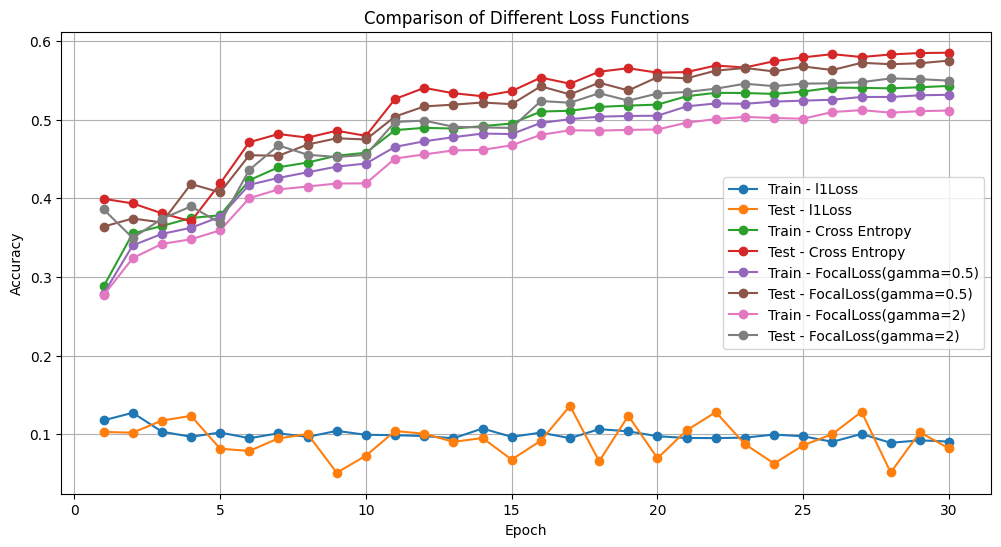

In [43]:
import matplotlib.pyplot as plt

# 数据
x = list(range(1, 31))  # x轴数据，表示每个数据点的编号

# l1Loss
train_acc_l1 = [
    0.1176, 0.1272, 0.1032, 0.0967, 0.1021,
    0.0949, 0.1011, 0.0966, 0.1042, 0.0992,
    0.0987, 0.0976, 0.0948, 0.1072, 0.0966,
    0.1020, 0.0949, 0.1064, 0.1036, 0.0974,
    0.0952, 0.0950, 0.0956, 0.0995, 0.0973,
    0.0903, 0.1003, 0.0890, 0.0922, 0.0906
]

test_acc_l1 = [
    0.1028, 0.1019, 0.1173, 0.1233, 0.0815,
    0.0787, 0.0947, 0.1001, 0.0510, 0.0727,
    0.1040, 0.1006, 0.0903, 0.0951, 0.0677,
    0.0918, 0.1360, 0.0655, 0.1234, 0.0694,
    0.1049, 0.1280, 0.0873, 0.0627, 0.0858,
    0.1001, 0.1285, 0.0513, 0.1024, 0.0819
]

# 交叉熵损失函数
train_acc_cross_entropy = [
    0.2878, 0.3552, 0.3647, 0.3749, 0.3783,
    0.4229, 0.4394, 0.4454, 0.4541, 0.4578,
    0.4866, 0.4895, 0.4886, 0.4917, 0.4950,
    0.5102, 0.5112, 0.5161, 0.5178, 0.5190,
    0.5297, 0.5340, 0.5338, 0.5326, 0.5356,
    0.5407, 0.5403, 0.5397, 0.5411, 0.5428
]

test_acc_cross_entropy = [
    0.3993, 0.3934, 0.3809, 0.3706, 0.4188,
    0.4713, 0.4816, 0.4771, 0.4858, 0.4793,
    0.5262, 0.5403, 0.5335, 0.5297, 0.5362,
    0.5534, 0.5456, 0.5609, 0.5653, 0.5596,
    0.5604, 0.5687, 0.5662, 0.5742, 0.5791,
    0.5832, 0.5795, 0.5828, 0.5846, 0.5850
]

# FocalLoss(gamma=0.5)
train_acc_focal_05 = [
    0.2784, 0.3400, 0.3546, 0.3624, 0.3764,
    0.4171, 0.4258, 0.4330, 0.4402, 0.4441,
    0.4653, 0.4724, 0.4776, 0.4822, 0.4816,
    0.4957, 0.5005, 0.5037, 0.5046, 0.5049,
    0.5168, 0.5205, 0.5201, 0.5228, 0.5241,
    0.5252, 0.5288, 0.5287, 0.5309, 0.5315
]

test_acc_focal_05 = [
    0.3639, 0.3742, 0.3692, 0.4181, 0.4074,
    0.4547, 0.4540, 0.4683, 0.4762, 0.4747,
    0.5039, 0.5167, 0.5190, 0.5217, 0.5196,
    0.5423, 0.5320, 0.5469, 0.5370, 0.5539,
    0.5525, 0.5622, 0.5656, 0.5612, 0.5675,
    0.5630, 0.5722, 0.5704, 0.5716, 0.5750
]

# FocalLoss(gamma=2)
train_acc_focal_2 = [
    0.2765, 0.3238, 0.3419, 0.3478, 0.3592,
    0.4001, 0.4112, 0.4149, 0.4187, 0.4189,
    0.4505, 0.4557, 0.4608, 0.4615, 0.4673,
    0.4806, 0.4864, 0.4860, 0.4869, 0.4874,
    0.4961, 0.5006, 0.5034, 0.5020, 0.5011,
    0.5096, 0.5120, 0.5088, 0.5107, 0.5115
]

test_acc_focal_2 = [
    0.3859, 0.3494, 0.3738, 0.3896, 0.3686,
    0.4362, 0.4671, 0.4553, 0.4524, 0.4552,
    0.4970, 0.4987, 0.4909, 0.4900, 0.4894,
    0.5236, 0.5214, 0.5335, 0.5241, 0.5331,
    0.5351, 0.5393, 0.5456, 0.5425, 0.5457,
    0.5461, 0.5476, 0.5523, 0.5514, 0.5495
]

# 绘制折线图
plt.figure(figsize=(12, 6))

# l1Loss
plt.plot(x, train_acc_l1, label='Train - l1Loss', marker='o')
plt.plot(x, test_acc_l1, label='Test - l1Loss', marker='o')

# 交叉熵损失函数
plt.plot(x, train_acc_cross_entropy, label='Train - Cross Entropy', marker='o')
plt.plot(x, test_acc_cross_entropy, label='Test - Cross Entropy', marker='o')

# FocalLoss(gamma=0.5)
plt.plot(x, train_acc_focal_05, label='Train - FocalLoss(gamma=0.5)', marker='o')
plt.plot(x, test_acc_focal_05, label='Test - FocalLoss(gamma=0.5)', marker='o')

# FocalLoss(gamma=2)
plt.plot(x, train_acc_focal_2, label='Train - FocalLoss(gamma=2)', marker='o')
plt.plot(x, test_acc_focal_2, label='Test - FocalLoss(gamma=2)', marker='o')

# 设置标题和标签
plt.title('Comparison of Different Loss Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 显示图形
plt.grid(True)
plt.show()


In [45]:
import numpy as np

# l1Loss
train_acc_l1_mean = np.mean(train_acc_l1)
test_acc_l1_mean = np.mean(test_acc_l1)

# 交叉熵损失函数
train_acc_cross_entropy_mean = np.mean(train_acc_cross_entropy)
test_acc_cross_entropy_mean = np.mean(test_acc_cross_entropy)

# FocalLoss(gamma=0.5)
train_acc_focal_05_mean = np.mean(train_acc_focal_05)
test_acc_focal_05_mean = np.mean(test_acc_focal_05)

# FocalLoss(gamma=2)
train_acc_focal_2_mean = np.mean(train_acc_focal_2)
test_acc_focal_2_mean = np.mean(test_acc_focal_2)

# 打印均值
print("l1Loss - Train Mean:", train_acc_l1_mean)
print("l1Loss - Test Mean:", test_acc_l1_mean)

print("Cross Entropy - Train Mean:", train_acc_cross_entropy_mean)
print("Cross Entropy - Test Mean:", test_acc_cross_entropy_mean)

print("FocalLoss(gamma=0.5) - Train Mean:", train_acc_focal_05_mean)
print("FocalLoss(gamma=0.5) - Test Mean:", test_acc_focal_05_mean)

print("FocalLoss(gamma=2) - Train Mean:", train_acc_focal_2_mean)
print("FocalLoss(gamma=2) - Test Mean:", test_acc_focal_2_mean)


l1Loss - Train Mean: 0.09956666666666665
l1Loss - Test Mean: 0.09335666666666666
Cross Entropy - Train Mean: 0.4792166666666667
Cross Entropy - Test Mean: 0.5190833333333332
FocalLoss(gamma=0.5) - Train Mean: 0.4669966666666667
FocalLoss(gamma=0.5) - Test Mean: 0.5071633333333334
FocalLoss(gamma=2) - Train Mean: 0.44972999999999996
FocalLoss(gamma=2) - Test Mean: 0.48967666666666665


### Task 2: Instance inference
---
The task is to visualizes an image along with model prediction and class probabilities.

**To do**: 
1. Calculate the prediction and the probabilities for each class.
         

In [63]:
inputs, classes = next(iter(test_dataloader))
input = inputs[0]

In [64]:
##################### Write your answer here ##################
# input: image, model
# outputs: predict_label, probabilities
# predict_label is the index (or label) of the class with the highest probability from the probabilities.
###############################################################
import torch

# Assuming 'model' is your trained model and 'input' is your input image tensor

# Set the model to evaluation mode
model.eval()
input = input.to(device)
# Forward pass to get the logits (raw scores) for each class
with torch.no_grad():
    logits = model(input.unsqueeze(0))  # Unsqueezing to add a batch dimension

# Calculate probabilities using softmax
probabilities = torch.softmax(logits, dim=1)

# Get the predicted class label (index with highest probability)
predict_label = torch.argmax(probabilities, dim=1)

# Convert probabilities to a list
probabilities = probabilities.squeeze()#.tolist()

# Now, 'predict_label' contains the index of the predicted class,
# and 'probabilities' is a list of probabilities for each class.

# Print the results
print("Predicted Label:", predict_label.item())
print("Probabilities for each class:", probabilities.tolist())

Predicted Label: 3
Probabilities for each class: [0.0859062448143959, 0.08525872230529785, 0.10601389408111572, 0.13361504673957825, 0.09310482442378998, 0.10033279657363892, 0.087469182908535, 0.10383518785238266, 0.10991007834672928, 0.09455398470163345]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


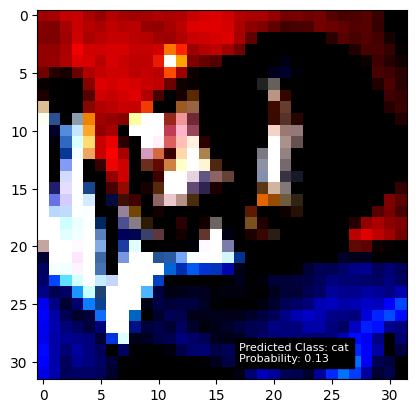

Print probabilities for each class:
airplane: 0.0859
automobile: 0.0853
bird: 0.1060
cat: 0.1336
deer: 0.0931
dog: 0.1003
frog: 0.0875
horse: 0.1038
ship: 0.1099
truck: 0.0946


In [65]:

predicted_class = class_names[predict_label.item()]
predicted_probability = probabilities[predict_label].item()
input = input.cpu()
image = input.numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.text(17, 30, f'Predicted Class: {predicted_class}\nProbability: {predicted_probability:.2f}', 
            color='white', backgroundcolor='black', fontsize=8)
plt.show()

# Print probabilities for each class
print('Print probabilities for each class:')
for i in range(len(class_names)):
    print(f'{class_names[i]}: {probabilities[i].item():.4f}')